<h1>Titanic DataScience Project</h1>

This is project based on the titanic dataset on kaggle.com

Data imports

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

Imports for plotting

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data from a CSV file

In [4]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Questions

1 - Who are the passengers in the titanic?(Gender,Age,Class,..etc)

2 - What deck were the passengers  on and how does that  relate to their class?

3 - Where did the passengers come from?

4 - Who was alone and who was with family?

5 - What factors helped someone survive the sinking?

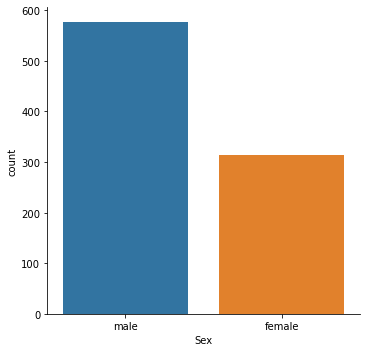

In [6]:
#Q1 Who are the passengers in the titanic?(Gender,Age,Class,..etc)
#getting the count  of males  and females and plotting them
sns.catplot(x='Sex',kind='count',data=titanic_df)
plt.show()

We can clearly see that there were more number of males onboard on Titanic

In [8]:
#creating a function for identifying children among the list of passengers
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [9]:
#applying the function declared above to the newly created column
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


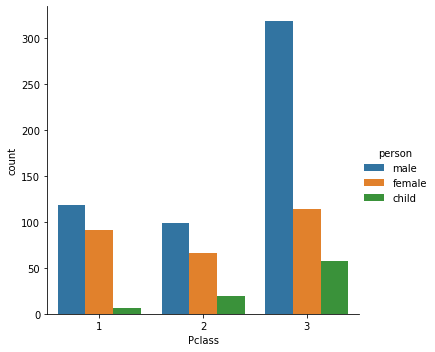

In [12]:
#plotting the number of males, females and children based on the class they're travelling on the ship
sns.catplot(x='Pclass',hue='person',kind='count',data=titanic_df)
plt.show()

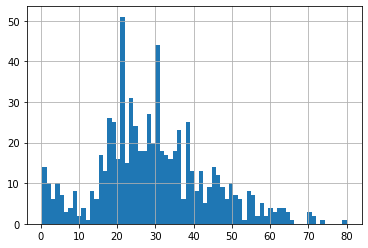

In [14]:
#plotting a histogram based on the age of passengers
titanic_df['Age'].hist(bins=70)
plt.show()

As seen in the histogram plotted above, a major group of passengers were in age group 20-40

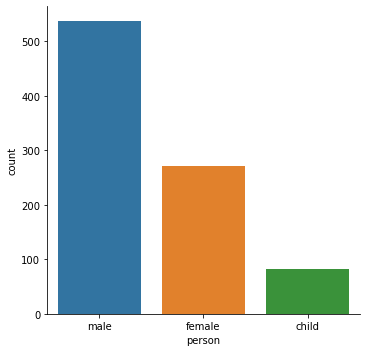

In [16]:
#viewing the number of adult males, adult females and children on the ship
sns.catplot(x='person',kind='count',data=titanic_df)
plt.show()

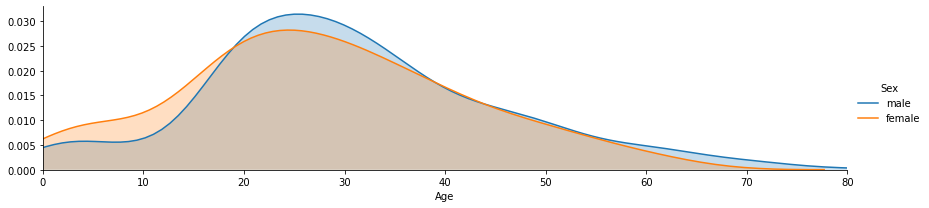

In [19]:
#plottig a FacetGrid
#FacetGrid allows to plot multiple figures in the same plot
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

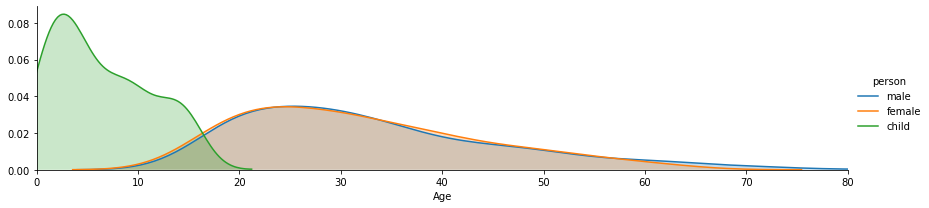

In [21]:
#Facetgrid plot for male, female and child
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

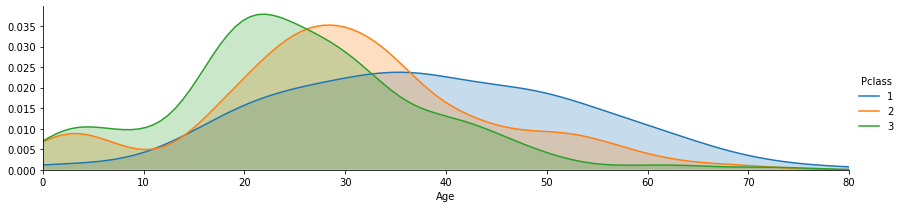

In [22]:
#Facetgrid plot based on the Class the passengers are travelling
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

In [23]:
#getting the mean age of the passengers travelling on the ship
titanic_df['Age'].mean()

29.69911764705882

In [25]:
#Q2 What deck were the passengers on and how does that relate to their class?

#removing null values
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [43]:
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


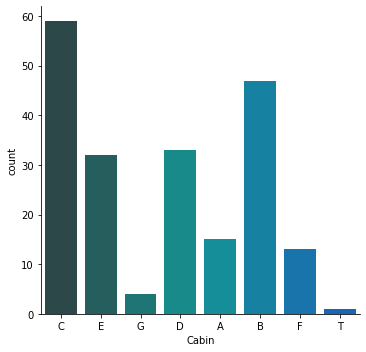

In [44]:
#plot for getting the count of the people travelling in different decks
sns.catplot(x='Cabin',kind='count',data=cabin_df,palette='winter_d')
plt.show()

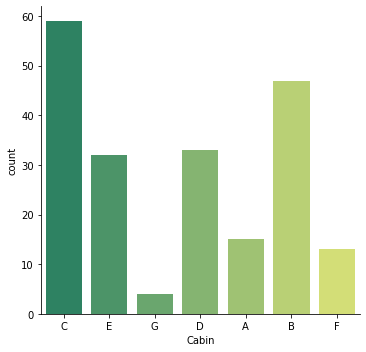

In [28]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin',kind='count',data=cabin_df,palette='summer')
plt.show()

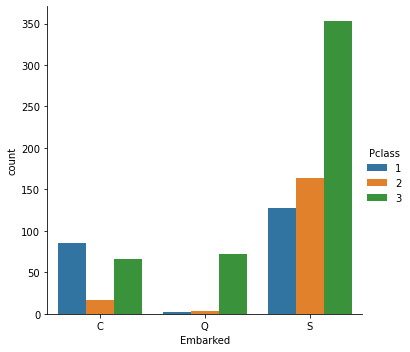

In [30]:
#Q3 Where did the passengers come from?

sns.catplot(x='Embarked',kind='count',data=titanic_df,hue='Pclass',order=['C','Q','S'])
plt.show()

In [32]:
#Q4 Who was alone and who was with family?

#creating a new column for identifying whether a passenger was traveling alone or not
titanic_df['Alone'] = titanic_df.SibSp+titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone']>0]= "With Family"
titanic_df['Alone'].loc[titanic_df['Alone']==0] = "Alone"
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


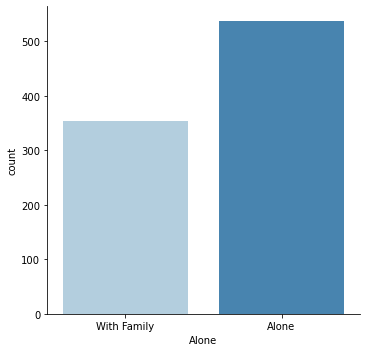

In [33]:
sns.catplot(x='Alone',kind='count',data=titanic_df,palette='Blues')
plt.show()

In [34]:
#Q5 what factors help someone to survive the crash

#mapping the Surived based on the values in Suvivor column 
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


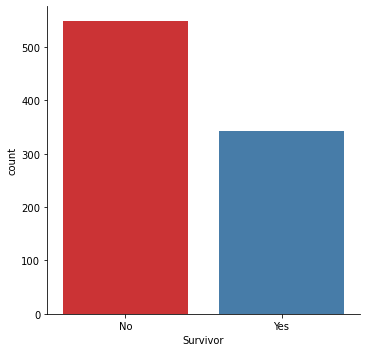

In [35]:
#checking the number of people survived the crash using catplot
sns.catplot(x='Survivor',kind='count',data=titanic_df,palette='Set1')
plt.show()

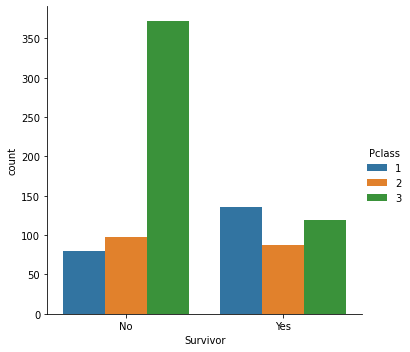

In [36]:
#Plotting the survivors based on the class which they're travelling
sns.catplot(x='Survivor',hue='Pclass',kind='count',data=titanic_df)
plt.show()

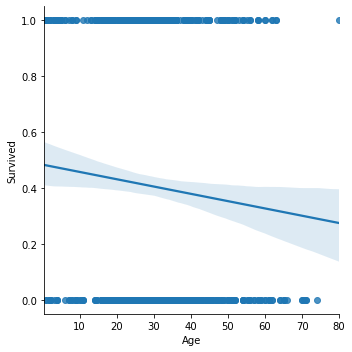

In [37]:
#Plotting the survivors based on Age
sns.lmplot('Age','Survived',data=titanic_df)
plt.show()

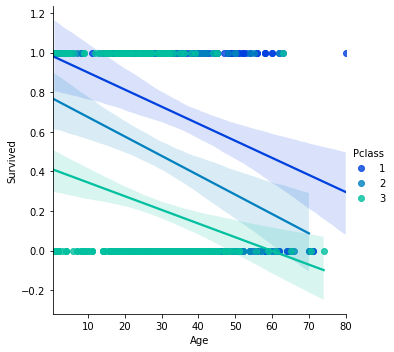

In [38]:
#plotting the survivors based on their age and class they're travelling 
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')
plt.show()

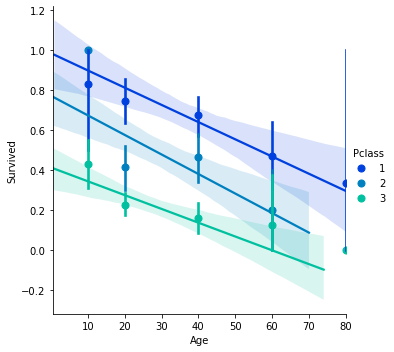

In [39]:
#creating bins to clean up the plot a little bit 
#bins makes the plot more readable
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)
plt.show()

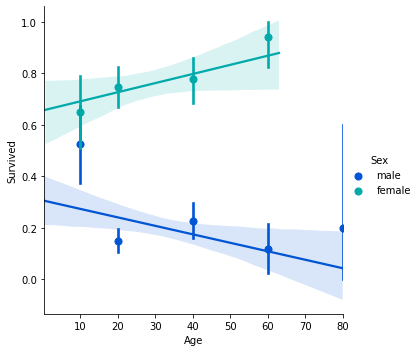

In [40]:
#plotting the survivors based on the age and sex
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)
plt.show()

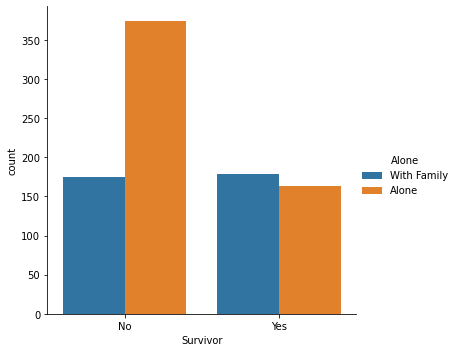

In [45]:
#Extra Question 
#Did having a family member increase the odds of survival?
sns.catplot(x='Survivor',hue='Alone',kind='count',data=titanic_df)
plt.show()